<a href="https://colab.research.google.com/github/kenltho2/scratch-work/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 12 Coding Project 1
Numerical Methods CPSMA 4413, Dr. Jacob \\
Kennedy Thomas




I started this project by creating functions to calculate true error, approximate error, and the relative true and approximate error. For my function approximation, I chose $f(x) = e^x$ centered at $x=2$.

In [35]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def TrueError(true_value, approx_value):
    terror = true_value - approx_value
    return terror

def relativeTrueError(TrueError, true_value):
    rterror = TrueError / true_value
    return rterror

def ApproxError (current_approx, previous_approx):
    if previous_approx == '' :
      return 'None'
    else:
      aerror = current_approx - previous_approx
    return aerror 

def relativeApproxError(ApproxError, current_approx):
    if current_approx == 0:
      return 'None'
    else:
      raerror = ApproxError / current_approx
      return raerror

def e_to_the_x(x,y):
  e_approximation = 0
  for i in range(y):
    e_approximation += x**i / math.factorial(i)
  return e_approximation

def T_e_to_the_x(i):
  return math.exp(i)

def tablevalue(x,n):
  for i in range(n):
    return math.exp(x)

def TrueError_func(x,n):
  for i in range(n):
   return TrueError(T_e_to_the_x(x),e_to_the_x(x,i))
    
def relativeTrueError_func(x,n):
  for i in range(n):    
    return relativeTrueError(TrueError(T_e_to_the_x(2),e_to_the_x(x,i)),T_e_to_the_x(2))

def ApproxError_func(x,n):
  for i in range(n):
    if i >= 1:
      return ApproxError(e_to_the_x(x,i), e_to_the_x(x, i-1))
    else:
      return 'None'

def relativeApproxError_func(x,n):
    for i in range(n):
      if i >= 1:
        return relativeApproxError(ApproxError(e_to_the_x(x,i), e_to_the_x(x, i-1)),e_to_the_x(x,i))
    else:
      return 'None'

After setting up the functions for my approximation of $e^x$ at $x= 2.1$, I constructed a Pandas DataFrame and used a for loop to append data to the frame for each expansion. With more time, I would have made a few more graphs highlighting how small the error gets with each new expansion.

In [37]:
df = pd.DataFrame(columns = ['Expansion','e^x approximation','e^x value', 'True Error', 'Relative True Error', 'Approximate Error', 'Relative Approximate Error'])
for i in range(1,21):
 df = df.append({'Expansion': [i],
             'e^x approximation': [e_to_the_x(2.1,i)],
             'e^x value': [tablevalue(2.1,i)],
             'True Error' : [TrueError(T_e_to_the_x(2.1),e_to_the_x(2.1,i))],
             'Relative True Error' : [relativeTrueError(TrueError(T_e_to_the_x(2.1),e_to_the_x(2.1,i)),T_e_to_the_x(2.1))],
             'Approximate Error': [ApproxError(e_to_the_x(2.1,i), e_to_the_x(2.1, i-1))],
             'Relative Approximate Error': [relativeApproxError(ApproxError(e_to_the_x(2.1,i), e_to_the_x(2.1, i-1)),e_to_the_x(2.1,i))]}, ignore_index=True)

df.drop(index = 0)
df



,Expansion,e^x approximation,e^x value,True Error,Relative True Error,Approximate Error,Relative Approximate Error
0,[1],[1.0],[8.166169912567652],[7.166169912567652],[0.8775435717470181],[1.0],[1.0]
1,[2],[3.1],[8.166169912567652],[5.066169912567652],[0.6203850724157562],[2.1],[0.6774193548387097]
2,[3],[5.305],[8.166169912567652],[2.861169912567652],[0.3503686481179311],[2.2049999999999996],[0.41564561734213]
3,[4],[6.8485],[8.166169912567652],[1.317669912567652],[0.16135715110945362],[1.5434999999999999],[0.2253778199605753]
4,[5],[7.6588375],[8.166169912567652],[0.5073324125676519],[0.062126115180002876],[0.8103375000000002],[0.10580424248458074]
5,[6],[7.99917925],[8.166169912567652],[0.1669906625676516],[0.020449080089633538],[0.34034175000000033],[0.04254708381488018]
6,[7],[8.1182988625],[8.166169912567652],[0.04787105006765202],[0.005862117808004334],[0.11911961249999958],[0.01467297700140558]
7,[8],[8.15403474625],[8.166169912567652],[0.01213516631765188],[0.0014860291235155398],[0.03573588375000014],[0.004382601357743159]
8,[9],[8.163415415734375],[8.166169912567652],[0.002754496833276221],[0.00033730584383715535],[0.009380669484375659],[0.0011491108814939291]
9,[10],[8.165604238614064],[8.166169912567652],[0.0005656739535879751],[6.927041191212648e-05],[0.002188822879688246],[0.000268054000136033]


Notice how the error becomes almost nonexistent after the 10th expansion. However, to get an approximation that is accurate up to 10 decimal places, we need to go to the 20th expansion. Next, I began working on the visualizations. First I constructed an array for the x-values (each new expansion). Then I plotted each estimation at every expansion as a scatter plot, with the dashed line being the true value of $e^x$ at $2.1$.

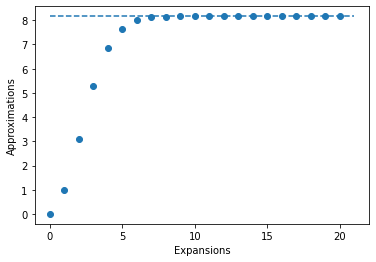

In [40]:
expansion = np.array(0)
for i in range(1,21):
  expansion = np.append(expansion,i)

ex = np.array(0)
for i in range(1,21):
  ex = np.append(ex,e_to_the_x(2.1,i))

calc = np.array(math.exp(2.1))
for i in range(0,21):
  calc = np.append(calc, T_e_to_the_x(2.1))

%matplotlib inline
plt.plot(calc, linestyle = 'dashed')
plt.xlabel('Expansions')
plt.ylabel('Approximations')
plt.scatter(expansion,ex)
plt.show()




Once we get to the 7th or 8th expansion, we see the approximation gets almost irrelevantly close to the true value. Below, I have graphed the 5th-Order Taylor polynomial in orange alongside the graph of $e^x$ in blue.

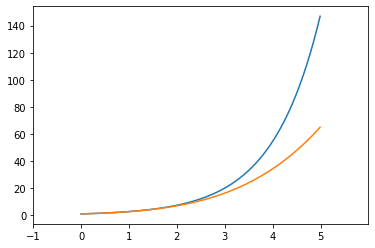

In [41]:
%matplotlib inline
x = np.arange(0,5,.01)
plt.plot(x,np.exp(x))
plt.xlim(x[0]-1,x[-1]+1)
plt.plot(x,e_to_the_x(x,5))

plt.show()

From $x=0$ to $x=2$, the lines are almost indistinguishable. At approximately $x=2.1$ the two graphs begin to diverge, so I would say the approximation using 5 terms in the Taylor series is only accurate up to $x=2$.

#Conclusion
All in all, I enjoyed this project. I have never seen the gap between computer science bridged together before, so it was fascinating to connect the two myself. I wish I had had more time to generate more visual data, but I have 7 more projects to go to make up for it.